In [1]:
from ar import *
from vb import *
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_order_selec( True_W):
    totals = []
    for t in range(400):
        #Time series is 3000 observations, burned in 500 observations.
        #The noise is a standard normal (Variance = 1)
        ts = generate_ar(3000,True_W,1,500) 
        best_F = -1000
        selected_order = 0
        for order in range(1,8):
            if(len(totals)) < order:
                totals.append(0)
            #Our updates take evidence 50 observations at a time.
            W, updates, F = test_vb_ar_fit(ts,order,50)
            if F > best_F :
                best_F = F
                selected_order = order
        totals[selected_order-1] = totals[selected_order-1] + 1
    plt.bar(['1','2','3','4','5','6','7'], totals, align='center', alpha=0.5)
    plt.ylabel('Votes')
    plt.xlabel('Order')
    plt.title('Order Selection Freq. (True Order: '+str(len(True_W))+')')
    plt.show()

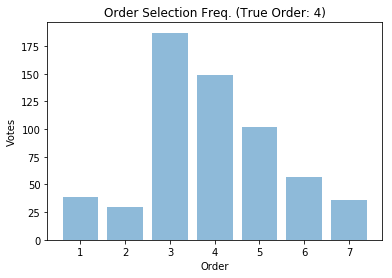

In [3]:
True_W = [.2,0,-.4,-.2]
test_order_selec(True_W)

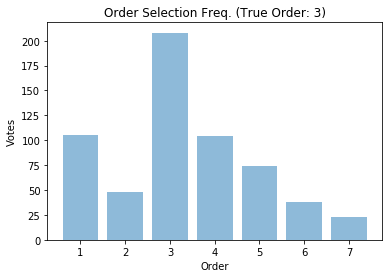

In [4]:
True_W = [.2,0,-.4]
test_order_selec(True_W)

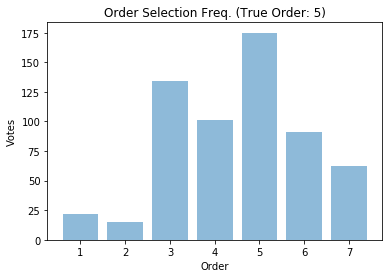

In [5]:
True_W = [.2,0,-.4,-.2, .3]
test_order_selec(True_W)